<a href="https://colab.research.google.com/github/shreyus3003/Deep_Learning/blob/master/ML_mini_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sklearn 
import matplotlib.pyplot as plt
import urllib
import pandas as pd
import numpy as np




In [3]:


csv_path = "https://raw.githubusercontent.com/shreyus3003/Deep_Learning/master/Datasets/real_estate.csv"

rl_est = pd.read_csv(csv_path)
rl_est.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
rl_est.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
No                                        414 non-null int64
X1 transaction date                       414 non-null float64
X2 house age                              414 non-null float64
X3 distance to the nearest MRT station    414 non-null float64
X4 number of convenience stores           414 non-null int64
X5 latitude                               414 non-null float64
X6 longitude                              414 non-null float64
Y house price of unit area                414 non-null float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [5]:
rl_est = rl_est.drop("No", axis=1)
rl_est.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


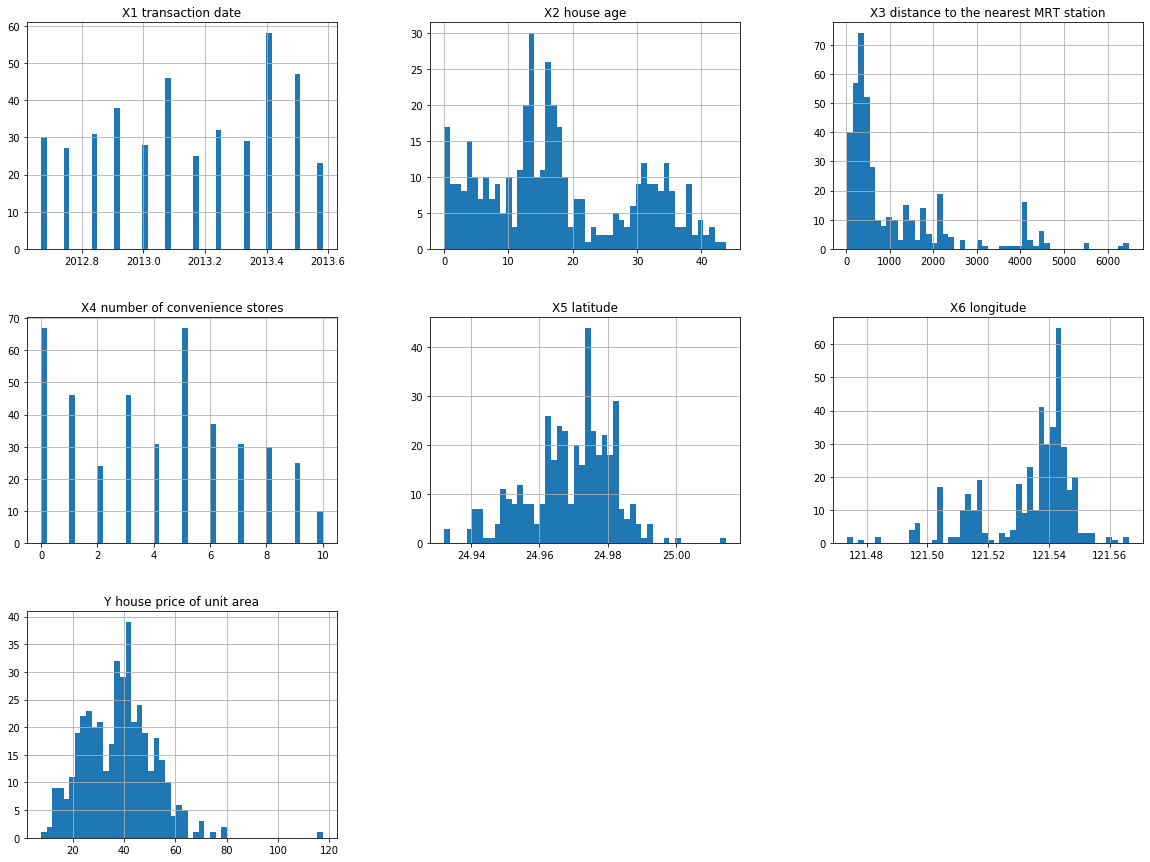

In [6]:
rl_est.hist(bins=50, figsize=(20,15))
plt.show()

In [0]:
np.random.seed(42)

In [9]:
test_set.head()


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
358,2013.167,1.1,193.5845,6,24.96571,121.54089,45.1
350,2013.000,13.2,492.2313,5,24.96515,121.53737,42.3
373,2013.083,0.0,274.0144,1,24.97480,121.53059,52.2
399,2012.917,12.7,170.1289,1,24.97371,121.52984,37.3
369,2012.667,20.2,2185.1280,3,24.96322,121.51237,22.8


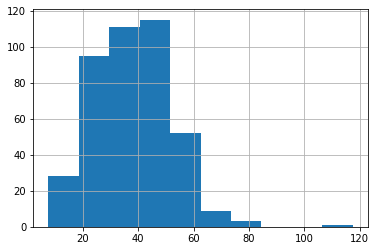

In [10]:
rl_est["Y house price of unit area"].hist()

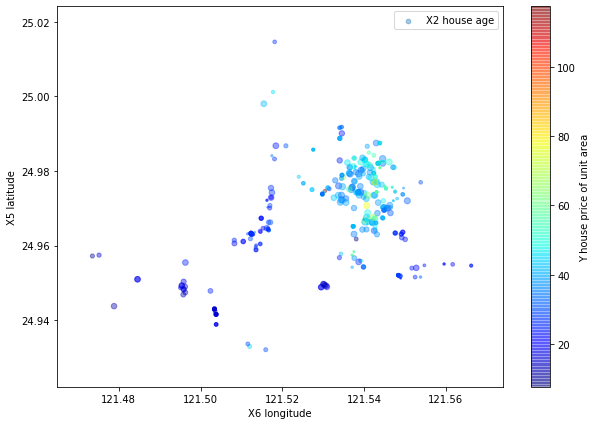

In [11]:
rl_est.plot(kind="scatter", x="X6 longitude", y="X5 latitude", alpha=0.4,
    s=rl_est["X2 house age"], label="X2 house age", figsize=(10,7),
    c="Y house price of unit area", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

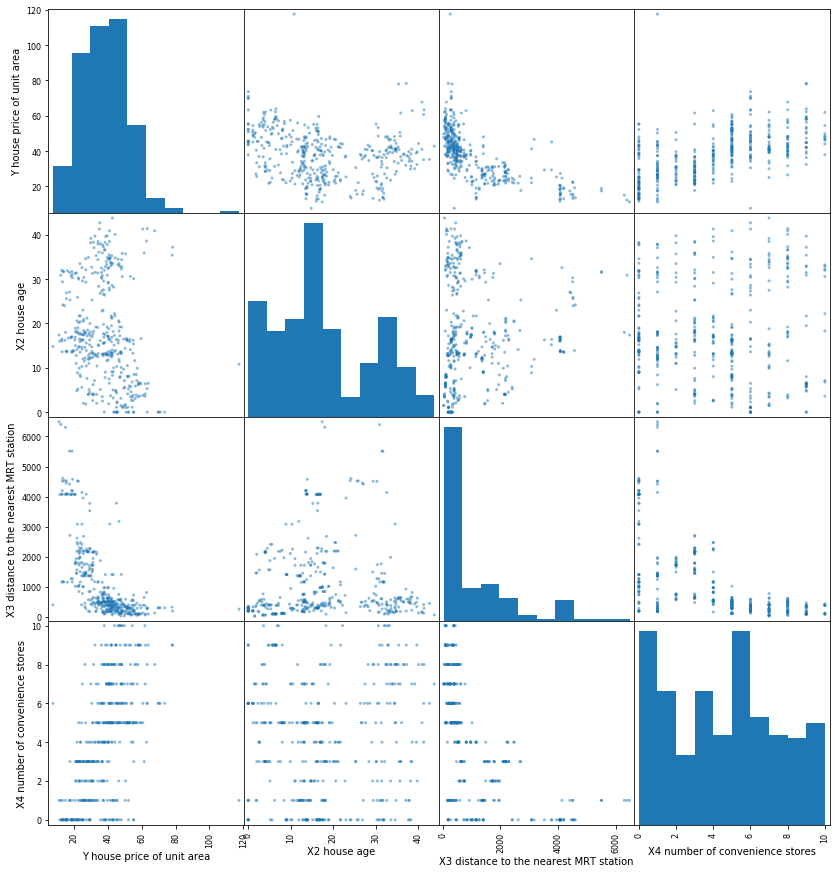

In [12]:
from pandas.plotting import scatter_matrix
attributes = ["Y house price of unit area", "X2 house age", "X3 distance to the nearest MRT station", "X4 number of convenience stores" ]
scatter_matrix(rl_est[attributes], figsize=(14, 15))
plt.show()

In [14]:
X = rl_est.drop("Y house price of unit area", axis=1)
y = rl_est['Y house price of unit area']
X.isnull().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
dtype: int64

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)


In [0]:
from sklearn.preprocessing import MinMaxScaler
scalarX=MinMaxScaler(feature_range=(0,1))
X_train[X_train.columns] = scalarX.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scalarX.fit_transform(X_test[X_test.columns])

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.602288049729772

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
predict = model.predict(X_test)
l_mse = mean_squared_error(y_test, predict)
print(l_mse)
l_mbe = mean_absolute_error(y_test, predict)
print(l_mbe)

66.72005516998371
6.324854926077296


In [26]:
from sklearn.tree import DecisionTreeRegressor
model_tree = DecisionTreeRegressor(random_state=42)
model_tree.fit(X_train, y_train)
model_tree.score(X_test, y_test)

0.5276133132764016

In [29]:
predict_tree = model_tree.predict(X_test)
tree_mse = mean_squared_error(y_test,predict_tree)
print(tree_mse)

79.24746987951809


In [0]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
svm_reg = SVR(kernel="linear")
'''prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])'''

In [36]:
svm_reg.fit(X_train,y_train)
svm_predict = svm_reg.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_predict)
print(svm_reg.score(X_test, y_test))
print(svm_mse)

0.6632309759309724
56.496285440153905
